# CPPN in pytorch

This code is initially based on https://github.com/johnguibas/cppn-art/blob/master/cppn.ipynb but optimized to use batching to speedup the generation of images.

Also inspired by Otoro http://blog.otoro.net/2016/03/25/generating-abstract-patterns-with-tensorflow/

In [333]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import uuid

In [381]:
x_dim = 256
y_dim = 256
z_dim = 8

img_size = x_dim*y_dim
scale = 1.0

In [382]:
from torch.autograd import Variable

class net(nn.Module):
    def __init__(self, z_dim, x_dim, y_dim, output_dim=1, batch_size=1):
        super(net, self).__init__()
        
        self.batch_size = batch_size
        self.image_size = x_dim*y_dim
        self.z_dim = z_dim
        
        self.ln11 = nn.Linear(1, 32)
        self.ln12 = nn.Linear(1, 32)
        self.ln13 = nn.Linear(1, 32)
        self.ln14 = nn.Linear(z_dim, 32)
        
        self.ln2 = nn.Linear(32, 32, bias=False)
        self.ln3 = nn.Linear(32, 32, bias=False)
        self.ln4 = nn.Linear(32, output_dim, bias=False)
        
        torch.nn.init.xavier_uniform_(self.ln11.weight)
        torch.nn.init.xavier_uniform_(self.ln12.weight)
        torch.nn.init.xavier_uniform_(self.ln13.weight)
        torch.nn.init.xavier_uniform_(self.ln14.weight)
        
        torch.nn.init.xavier_uniform_(self.ln2.weight)
        torch.nn.init.xavier_uniform_(self.ln3.weight)
        torch.nn.init.xavier_uniform_(self.ln4.weight)
        
        self.tanh1 = nn.Tanh()
        self.tanh2 = nn.Tanh()
        self.tanh3 = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, y, z, r):
        
        x = x.reshape([self.batch_size*self.image_size, 1])
        y = y.reshape([self.batch_size*self.image_size, 1])
        z = z.reshape([1, 1, z_dim])*torch.ones([x_dim*y_dim, 1])*scale
        
        r = r.reshape([self.batch_size*self.image_size, 1])
        
        #_input = torch.cat((x, y, z, r), dim=1)
        U = self.ln11(x) + self.ln12(y) + self.ln13(r) + self.ln14(z)
        
        #U = self.ln1(_input)
        U = self.tanh1(U)
        U = self.ln2(U)
        U = self.tanh2(U)
        U = self.ln3(U)
        U = self.tanh3(U)
        U = torch.sin(self.ln4(U))
        return self.sigmoid(U)

G = net(z_dim, x_dim, y_dim)

x, y = torch.meshgrid([torch.arange(0, x_dim).float()*scale, torch.arange(0, y_dim).float()*scale])
z = torch.rand(z_dim)
print("Random vector")
print(z.data.numpy())
r = ((x*scale-x_dim*scale/2)**2 + (y*scale-y_dim*scale/2)**2).float().sqrt()
image = G.forward(x, y, z, r)

Random vector
[0.36748868 0.3959257  0.00115961 0.00846958 0.6900251  0.3101086
 0.8950165  0.6982411 ]


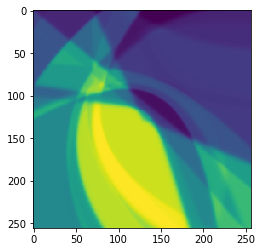

In [383]:
import scipy.misc

imgplot = plt.imshow(image.reshape([x_dim, y_dim]).detach().numpy())
plt.show()

tensor([0.4712, 0.3692, 0.0644, 0.0811, 0.2984, 0.0542, 0.4455, 0.1265])


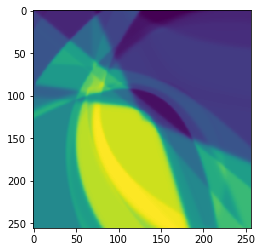

In [384]:
z = torch.rand(z_dim)
print(z)
image = G.forward(x, y, z, r)
imgplot = plt.imshow(image.reshape([x_dim, y_dim]).detach().numpy())
plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


0


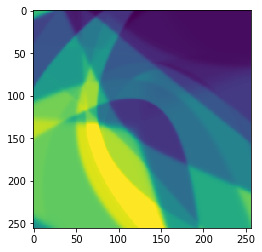

In [398]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig = plt.figure()

z = torch.rand(z_dim)
image = G.forward(x, y, z, r)
im = plt.imshow(image.reshape([x_dim, y_dim]).detach().numpy(), animated=True)

def animate(i):
    global z
    z += torch.ones(z_dim)
    image = G.forward(x, y, z, r)
    im.set_array(image.reshape([x_dim, y_dim]).detach().numpy())
    print(i)
    return im,

anim = matplotlib.animation.FuncAnimation(fig, animate, interval=50, frames=20)
anim

In [400]:
from IPython.display import HTML, Image
ani.save('animation.gif', fps=60)
Image(url='animation.gif')

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
